In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA

from sklearn.feature_selection import VarianceThreshold, SelectFromModel, RFECV, SequentialFeatureSelector

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score

from sklearn.datasets import make_classification, load_wine, load_breast_cancer, load_diabetes, load_digits

In [2]:
plt.style.use('seaborn-darkgrid')

In [3]:
def plot_scatter(x, y, auto_scaled=True, title=None, clusters=None):
    plt.figure(figsize=(4, 4))
    plt.scatter(x, y, c=clusters, cmap='bwr')
    
    if not auto_scaled:
        plt.axis('square')
    
    plt.grid(True)
    plt.title(title)
    
    plt.show()
    
def return_X_y(data, target_column):
    return data.drop(target_column, axis=1), data[target_column]

In [4]:
wine_sklearn = load_wine(as_frame=True)
wine_data, wine_labels = wine_sklearn['data'], wine_sklearn['target']

# Homework

## Exercise  1 - Scaling (2 points)

Perform standardization for wine dataset (`wine_data`) using only basic python, numpy and pandas (without using `StandardScaler` and sklearn at all). Implementation of function (or class) that can get dataset as input and return standardized dataset as output is preferrable, but not necessary.

Compare you results (output) with `StandardScaler`.

**NOTE:**

- 1 point for functional version, 2 points for implementing scaling as sklearn pipeline compartible class. 
- Maximum for the exercise is 2 points.


### Simple version (1 point)

In [5]:
# 1 point
def scale(X):
   
   # A value is standardized as follows:

#y = (x – mean) / standard_deviation

    arr = np.array(X)
    avg = np.mean(arr, axis=0)
    std = np.std(arr, axis=0)
    
    return (X-avg)/std

In [6]:
np.array(scale(wine_data))

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [7]:
StandardScaler().fit_transform(wine_data)

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [8]:
assert np.allclose(np.array(scale(wine_data)), StandardScaler().fit_transform(wine_data))

In [9]:
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [10]:
wine_data.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [11]:
wine_data.shape

(178, 13)

In [12]:
wine_labels.shape

(178,)

In [13]:
wine_data.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

In [14]:
display(wine_labels.dtypes)
display(wine_labels.memory_usage(deep=True))

dtype('int32')

840

In [15]:
wine_data.memory_usage(deep=True)

Index                            128
alcohol                         1424
malic_acid                      1424
ash                             1424
alcalinity_of_ash               1424
magnesium                       1424
total_phenols                   1424
flavanoids                      1424
nonflavanoid_phenols            1424
proanthocyanins                 1424
color_intensity                 1424
hue                             1424
od280/od315_of_diluted_wines    1424
proline                         1424
dtype: int64

### Pipeline Version (2 points)

super().__init__()
        self.means_ = None
        self.std_ = None

In [16]:
# 2 points
from sklearn.base import BaseEstimator, TransformerMixin
class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self, copy=True, with_mean=True, with_std=True):
        pass
    

    def fit(self, X, y=None):
        self.means_ = np.array(X).mean(axis=0, keepdims=True)
        self.std_ = np.array(X).std(axis=0, keepdims=True)

        return self

    def transform(self, X, y=None):
        X = (np.array(X) - self.means_) / self.std_

        return X
    

In [17]:

print('--> Before applying transform')
print(wine_data.describe(), '\n')

# Instantiating 
wine_CustomScaler = CustomScaler()

# Fitting operation
wine_CustomScaler.fit(wine_data)

print('Learned parameters')
print('mean:', wine_CustomScaler.means_ , '\n', 'std:', wine_CustomScaler.std_)


# Applying the CustomScaler
wine_CustomScaler.transform(wine_data)

print('\n--> After applying transform')
print(wine_data.describe())

--> Before applying transform
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453      

In [18]:
assert np.allclose(CustomScaler().fit_transform(wine_data), StandardScaler().fit_transform(wine_data))

## Exercise  2 - Visualization (3 points)

As noted earlier, standardization/normalization of data can be crucial for some distance-based ML methods.

Let’s generate some toy example of unnormalized data and visualize the importance of this process once more:

In [19]:
feature_0 = np.random.randn(1000) * 10   
feature_1 = np.concatenate([np.random.randn(500), np.random.randn(500) + 5])
data = np.column_stack([feature_0, feature_1])
data 

array([[  4.7598363 ,  -1.01271166],
       [-15.81457825,   0.82149235],
       [ 15.35355901,  -0.04691178],
       ...,
       [  1.33374428,   4.94271985],
       [ -1.53050125,   6.52945104],
       [ -4.76203758,   6.76819615]])

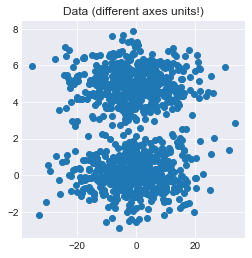

In [20]:
plot_scatter(data[:, 0], data[:, 1], auto_scaled=True, title='Data (different axes units!)')

**NOTE:** on the plot above axes are scaled differently and we can clearly see two potential *classes/clusters*. In fact `matplotlib` performed `autoscaling` (which is basically can be considered as `MinMaxScaling` of original data) just for better visualization purposes.

Let's turn this feature off and visualize the original data on the plot with equally scaled axes:

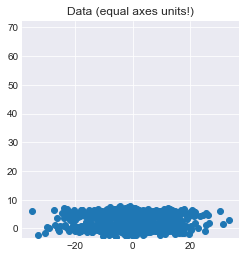

In [21]:
plot_scatter(data[:, 0], data[:, 1], auto_scaled=False , title='Data (equal axes units!)')

This picture is clearly less interpretable, but much closer to "how distance-based algorithm see the original data": separability of data is hardly noticable only because the variation (std) of x-feature is much bigger in absolute numbers.

Perform `StandardScaling` and `MinMaxScaling` of original data; visualize results for each case (**use `plot_scatter` with `auto_scaled=False`**):

### MinMaxScaling (0.5 point)

In [22]:
## your code
MinMaxScaler().fit_transform(data)

array([[0.57955127, 0.17571749],
       [0.28075858, 0.34555838],
       [0.73339899, 0.26514719],
       ...,
       [0.52979572, 0.72716966],
       [0.48819961, 0.87409543],
       [0.4412695 , 0.89620239]])

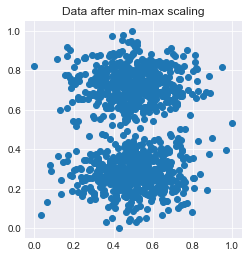

In [23]:
plot_scatter(x= MinMaxScaler().fit_transform(data)[:, 0], y = MinMaxScaler().fit_transform(data)[:, 1], auto_scaled=False, title='Data after min-max scaling')

### StandardScaler (0.5 point)

In [24]:
StandardScaler().fit_transform(data)

array([[ 0.51813772, -1.3357651 ],
       [-1.48341227, -0.6415076 ],
       [ 1.54873159, -0.9702039 ],
       ...,
       [ 0.18483567,  0.91840237],
       [-0.09380801,  1.51898989],
       [-0.408183  ,  1.60935638]])

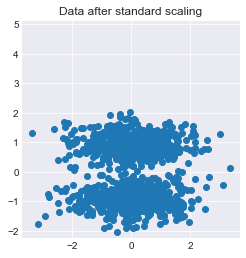

In [25]:
## your code
plot_scatter(x= StandardScaler().fit_transform(data)[:, 0], y = StandardScaler().fit_transform(data)[:, 1], auto_scaled=False, title='Data after standard scaling')

### (Bonus) K-means (2 points)

Illustrate the impact of scaling on basic distance-based clustering algorithm [K-means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) using `data` generated above.

**NOTE:** basically, you don't need understanding K-means algorithm here, you just need to:

1) run algorithm (with k=2, k - number of clusters/classes) on unscaled data    
2) run algorithm (with k=2) on scaled data    
3) plot results: highlight different clusters using different colors.

You can use this [question](https://stats.stackexchange.com/questions/89809/is-it-important-to-scale-data-before-clustering/89813) as a hint, but I recommend you to plot results using `plot_scatter` with `equal_scaled=True`: it might help you to intuitively understand the reasons of such scaling impact.


Text(0.5, 1.0, 'Normalised \n K-means')

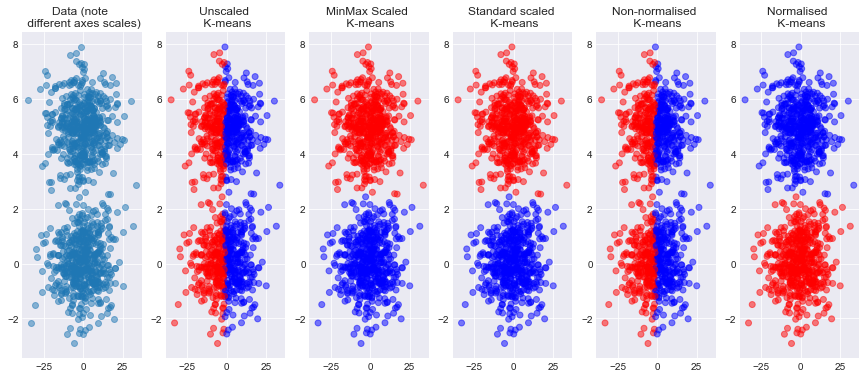

In [26]:
## your code
from sklearn.cluster import KMeans

x = feature_0
y = feature_1

fig, axes = plt.subplots(1,6,figsize=(15,6), alpha=0.5)

axes[0].scatter(x, y, alpha=0.5)
axes[0].set_title('Data (note \n different axes scales)')

km = KMeans(2)

clusters = km.fit_predict(data)

axes[1].scatter(x, y, c=clusters, cmap='bwr', alpha=0.5)
axes[1].set_title('Unscaled \n K-means')

clusters = km.fit_predict(MinMaxScaler().fit_transform(data))

axes[2].scatter(x, y, c=clusters, cmap='bwr', alpha=0.5)
axes[2].set_title('MinMax Scaled \n K-means')

clusters = km.fit_predict(StandardScaler().fit_transform(data))

axes[3].scatter(x, y, c=clusters, cmap='bwr', alpha=0.5)
axes[3].set_title('Standard scaled \n K-means')

clusters = km.fit_predict(np.array([x, y]).T)

axes[4].scatter(x, y, c=clusters, cmap='bwr', alpha=0.5)
axes[4].set_title('Non-normalised \n K-means')


clusters = km.fit_predict(np.array([x / 10, y]).T)

axes[5].scatter(x, y, c=clusters, cmap='bwr', alpha=0.5)
axes[5].set_title('Normalised \n K-means')

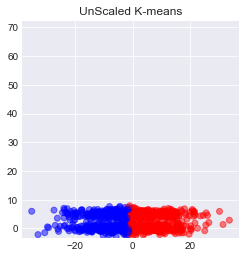

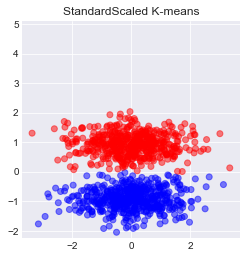

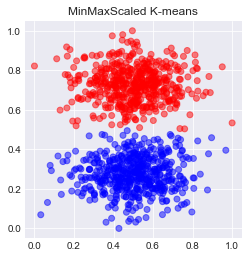

In [27]:
def plotscatter(x, y, equal_scaled=True, title=None, clusters=None):
    plt.figure(figsize=(4, 4))
    plt.scatter(x, y, c=clusters, alpha=0.5, cmap='bwr')
    
    if  equal_scaled:
        plt.axis('square')
    
    plt.grid(True)
    plt.title(title)
    
    plt.show()

km = KMeans(2)

plotscatter(data[:, 0], data[:, 1], clusters=km.fit_predict(data), title='UnScaled K-means')    
    
plotscatter(StandardScaler().fit_transform(data)[:, 0], StandardScaler().fit_transform(data)[:, 1], 
        clusters=km.fit_predict(StandardScaler().fit_transform(data)), title='StandardScaled K-means')

plotscatter(MinMaxScaler().fit_transform(data)[:, 0], MinMaxScaler().fit_transform(data)[:, 1], 
        clusters=km.fit_predict(MinMaxScaler().fit_transform(data)), title='MinMaxScaled K-means')    

## Exercise  3 - Preprocessing Pipeline (2 points)

In [28]:
wine_train, wine_val, wine_labels_train, wine_labels_val = train_test_split(wine_data, wine_labels, 
                                                                            test_size=0.3, random_state=42)

Train model (for example, `LogisticRegression(solver='liblinear', penalty='l1')` on raw `wine_train` data; then train same model after data scaling; then add feature selection (and train model again on scaled data). For each experiment all required preprocessing steps (if any) should be wrapped into sklearn pipeline.

Measure `accuracy` of all 3 approaches on `wine_val` dataset. Describe and explain results.

In [29]:
display(wine_train.describe())
display(wine_labels_train.describe())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,12.963306,2.402984,2.366613,19.500000,100.879032,2.273306,2.007339,0.364194,1.592984,4.974032,0.959323,2.600323,737.266129
std,0.841487,1.102317,0.271924,3.484134,15.367367,0.653762,1.010858,0.126607,0.581649,2.187782,0.233760,0.731616,304.705298
min,11.030000,0.890000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.420000,1.740000,0.480000,1.270000,278.000000
25%,12.290000,1.640000,2.217500,17.350000,88.000000,1.695000,1.172500,0.270000,1.247500,3.170000,0.780000,1.827500,498.750000
50%,12.945000,1.900000,2.360000,19.500000,98.000000,2.250000,2.125000,0.340000,1.555000,4.550000,0.975000,2.780000,666.000000
75%,13.695000,3.170000,2.522500,21.500000,108.500000,2.800000,2.807500,0.450000,1.952500,6.107500,1.120000,3.177500,924.250000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,10.800000,1.710000,4.000000,1547.000000


count    124.000000
mean       0.951613
std        0.774123
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: target, dtype: float64

In [30]:
logreg_model = LogisticRegression(solver='liblinear', penalty='l1')

# Training model on raw wine_train data
logreg_model.fit(wine_train, wine_labels_train)
logreg_pred = logreg_model.predict(wine_val)
print("Accuracy original model without feature scaling", 
      accuracy_score(wine_labels_val, logreg_pred))
print("training accuracy : {}".format(logreg_model.score(wine_train, wine_labels_train)))
print("testing accuracy : {}".format(logreg_model.score(wine_val, wine_labels_val)))
          
#Training model with scailing dataset
scaling_model = make_pipeline(StandardScaler(), logreg_model)
scaling_model.fit(wine_train, wine_labels_train)
scaled_pred = scaling_model.predict(wine_val)
print("Accuracy of Logistic Regression model with scaling", 
      accuracy_score(wine_labels_val, scaled_pred))
print("training accuracy : {}".format(scaling_model.score(wine_train, wine_labels_train)))
print("testing accuracy : {}".format(scaling_model.score(wine_val, wine_labels_val)))
          
#Training model with feature selection
feature_model = RandomForestClassifier(random_state=42)
scailing_feature_model = make_pipeline(StandardScaler(), SelectFromModel(feature_model), logreg_model)
scailing_feature_model.fit(wine_train, wine_labels_train)
feature_pred = scailing_feature_model.predict(wine_val)
print("Accuracy of Logistic Regression model with feature selection", 
      accuracy_score(wine_labels_val, feature_pred))
print("training accuracy : {}".format(scailing_feature_model.score(wine_train, wine_labels_train)))
print("testing accuracy : {}".format(scailing_feature_model.score(wine_val, wine_labels_val)))

#Training model with scailing dataset (MinMaxScaling)
scaling_minmaxmodel = make_pipeline(MinMaxScaler(), logreg_model)
scaling_minmaxmodel.fit(wine_train, wine_labels_train)
scaledminmax_pred = scaling_minmaxmodel.predict(wine_val)
print("Accuracy of Logistic Regression model with minmax scaling", 
      accuracy_score(wine_labels_val, scaledminmax_pred))
print("training accuracy : {}".format(scaling_minmaxmodel.score(wine_train, wine_labels_train)))
print("testing accuracy : {}".format(scaling_minmaxmodel.score(wine_val, wine_labels_val)))
          
#Training model with feature selection (MinMaxScaling)
feature_model = RandomForestClassifier(random_state=42)
scailing_feature_minmaxmodel = make_pipeline(MinMaxScaler(), SelectFromModel(feature_model), logreg_model)
scailing_feature_minmaxmodel.fit(wine_train, wine_labels_train)
featureminmax_pred = scailing_feature_minmaxmodel.predict(wine_val)
print("Accuracy of Logistic Regression model with feature selection minmax scaling", 
      accuracy_score(wine_labels_val, featureminmax_pred))
print("training accuracy : {}".format(scailing_feature_minmaxmodel.score(wine_train, wine_labels_train)))
print("testing accuracy : {}".format(scailing_feature_minmaxmodel.score(wine_val, wine_labels_val)))

Accuracy original model without feature scaling 0.9814814814814815
training accuracy : 0.967741935483871
testing accuracy : 0.9814814814814815
Accuracy of Logistic Regression model with scaling 0.9814814814814815
training accuracy : 1.0
testing accuracy : 0.9814814814814815
Accuracy of Logistic Regression model with feature selection 1.0
training accuracy : 0.9838709677419355
testing accuracy : 1.0
Accuracy of Logistic Regression model with minmax scaling 1.0
training accuracy : 0.967741935483871
testing accuracy : 1.0
Accuracy of Logistic Regression model with feature selection minmax scaling 1.0
training accuracy : 0.9838709677419355
testing accuracy : 1.0


При обработке датасета с помощью логистической регрессии, модель показывает высокую точность даже на необработанных данных. Feature selection улучшает обучение модели при любом скалировании, модель смогла идеально предсказать целевую переменную

## Exercise 4 - manual PCA (5 points)
The task is to solve PCA as an optimization problem, without explicitly doing eigen value decomposition.
In the most general setting PCA is minimization of reconstruction error of a projection of given rank $q$

$$\min_{\mu, \lambda_1,\ldots, \lambda_n, \mathbf{V}_q} \sum_{i=1}^n ||x_i - \mu - \mathbf{V}_q \lambda_i||^2$$

With a number of steps that can be found here https://stats.stackexchange.com/a/10260 this task transforms to
 $$\max_{u_i} \sum_{i=1}^q u_i^T \mathbf{S} u_i$$
 where $\mathbf{S}$ is the sample covariance matrix (after standartization) and $u_1, \ldots, u_q$ are the $q$ are orthonormal columns in $\mathbf{V}_q$.
 Let us solve this optimization problem with `scipy.optimize` library.
 
 Additional 2 point are given for visualization of the results.

https://satya-python.blogspot.com/2017/08/python-scipy-package-sklearn-skimage.html

### PCA (3 points)

In [31]:
wine_data, wine_labels = wine_sklearn['data'], wine_sklearn['target']

Find a covariance matrix of standartized data and assing it to S.

In [32]:
## your code
S = np.cov(StandardScaler().fit_transform(wine_data), rowvar=False)

In [33]:
display(S.shape)

(13, 13)

In [34]:
np.linalg.norm(S)

5.787241159764733

If your code is correct, the following assert should be Ok.

In [35]:
assert np.allclose(np.linalg.norm(S), 5.787241159764733)

In [36]:
pca = PCA(n_components=2)  
reduced = pca.fit_transform(wine_data)
print(reduced.shape) 

(178, 2)


C:\Users\НР\AppData\Local\Temp\ipykernel_13952\3783357819.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c = plt.colorbar();


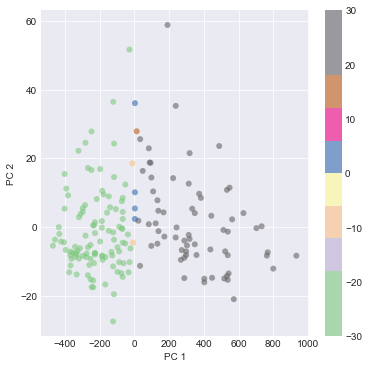

In [37]:
plt.figure(figsize = (6,6))
plt.scatter(reduced[:, 0], reduced[:, 1],
            edgecolor='none', c= reduced[:, 0], alpha=0.6,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('PC 1')
plt.ylabel('PC 2')
c = plt.colorbar();
plt.clim(-30, 30)

#not solved
from scipy.optimize import minimize

def objective(x):
    #return x# your code: write objective of the problem (don't forget that scipy does min while we need max)

def norm_constraint(x):
    #return x# your code: constaraint norm of x to be 1, function should return 0 if constraint holds

con1 = {'type': 'eq', 'fun': norm_constraint}

x0 = # your code: initial vector to start optimization

sol = minimize(objective, 
               x0, 
               constraints = [con1]
              )
x0 = sol.x

Hurray! We have first vector! Let's do another one.

# not solved
def orthogonality_constraint(x):
    return x*x0
    # your code: x should be orthogonal to x0, function should return 0 if constraint holds

con2 = {'type': 'eq', 'fun': orthogonality_constraint}

x1 = np.zeros(13)# your code: initial vector to start optimization


sol = minimize(objective, 
               x1, 
               constraints = [con2]
               )

x1 = sol.x

If your solution is correct, the following asserts should be Ok.

In [38]:
#assert np.allclose(x0@S@x0, 4.732436977583595)
#assert np.allclose(x1@S@x1, 2.5110809296451233)

### Visualization (2 points)

Visualize the points after applying custom dimension reduction with 2 components.

## Exercise 5 - Boruta (3 points)

Let us classify handwritten digits 0, 1 and 2. 
To make task not so easy the images are binarized (no shadows of gray present) as it happens with xerocopied documents.

Let us also find out to which parts of an image there's no need to look in order to clasify three digits of interest.

In [39]:
X, y = load_digits(n_class=3, return_X_y=True, as_frame=True)
X = (X>10).astype(int)

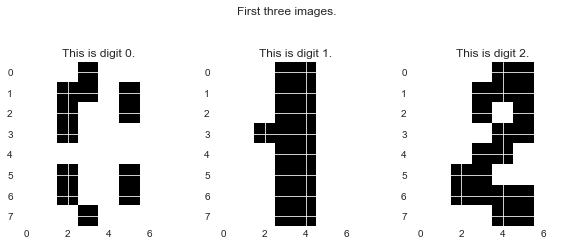

In [40]:
f, ax = plt.subplots(1,3,figsize=(10,4))
for i in range(3):
    ax[i].imshow(X.iloc[i].values.reshape(8,8))
    ax[i].set_title(f"This is digit {y[i]}.")
plt.suptitle("First three images.")
plt.show()

Split data into train and test, let test size be 30% of the dataset and fix random state to 42:

In [41]:
display(np.array(X))
display(np.array(y))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1,
       0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1,
       2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
       0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0,
       2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2,
       2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1,
       2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2,
       0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2,
       0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1,
       2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1,
       1, 1, 1, 0, 1, 2, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 2,
       2, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1,

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
y_val.sum(), y_val.shape

(169, (162,))

In [44]:
assert y_val.shape[0] == 162
assert y_val.sum() == 169

Fit a RandomForestClassifier with max_depth=13 and evaluate it's performance:

In [45]:
clf = RandomForestClassifier(max_depth=13)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print(acc)

0.9814814814814815


In [46]:
assert acc > 0.98

Now we will use Boruta to find redundand pixels. If the package is not installed in your system, uncomment and run the following cell.

In [47]:
# ! pip install boruta

In [48]:
from boruta import BorutaPy

feat_selector = BorutaPy(RandomForestClassifier(max_depth=13), 
                         n_estimators='auto', 
                         verbose=0, 
                         max_iter=100,
                         random_state=42)

feat_selector.fit(np.array(X_train), np.array(y_train))
feat_selector.transform(np.array(X_train))

array([[0, 1, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 1],
       ...,
       [0, 1, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]])

Let us print redundant pixels as a mask. Does the result looks similar to mine (or to Among us chracters)? 

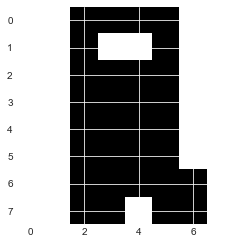

In [49]:
mask = np.array(feat_selector.support_).reshape(8,8)
plt.imshow(mask);

At the end let us redo  classification but only with selected features

In [50]:
clf = RandomForestClassifier(max_depth=13)
clf.fit(feat_selector.transform(np.array(X_train)), y_train)
y_pred = clf.predict(feat_selector.transform(np.array(X_val)))
acc = accuracy_score(y_val, y_pred)

print(acc)

0.9938271604938271


In [51]:
assert acc > 0.99

# Materials & References

1. General article about feature engineering and selection (main reference):
https://github.com/Yorko/mlcourse.ai/blob/master/jupyter_english/topic06_features_regression/topic6_feature_engineering_feature_selection.ipynb

2. Feature engineering/preprocessing, using scikit-learn API (great code examples, but really brief explanation):    
https://scikit-learn.org/stable/modules/preprocessing

3. Feature scaling/normalization:     
https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

4. Log Transform/power transform:    
https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9

6. Missing values preprocessing using scikit-learn API (great code examples, great explanation):    
https://scikit-learn.org/stable/modules/impute.html

7. Feature selection scikit-learn API (great code examples, great explanation):   
https://scikit-learn.org/stable/modules/feature_selection.html

8. Melbourne housing dataset source:    
https://www.kaggle.com/anthonypino/melbourne-housing-market